In [1]:
import pandas as pd

In [3]:
dbdata = pd.read_csv("diabetes_dataset.csv")
dbdata.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
dbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
nonresult_data = dbdata.drop(['Outcome'], axis = 1)
nonresult_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
result_data = dbdata['Outcome']
result_data

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
# SPLITTING OF DATA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(nonresult_data, result_data, train_size = 0.8)

In [32]:
# MODELLING OUR DECISION TREE CLASSIFIER
dctree_model = DecisionTreeClassifier()

dctree_model = dctree_model.fit(xTrain,yTrain)

yPred = dctree_model.predict(xTest)

In [33]:
from sklearn import metrics
print("Accuracy of our model: ", metrics.accuracy_score(yTest, yPred)*100)

Accuracy of our model:  74.67532467532467


In [35]:
from sklearn.metrics import classification_report
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.60      0.61      0.61        49

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest,yPred)

array([[85, 20],
       [19, 30]])

In [37]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [39]:
features = nonresult_data.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

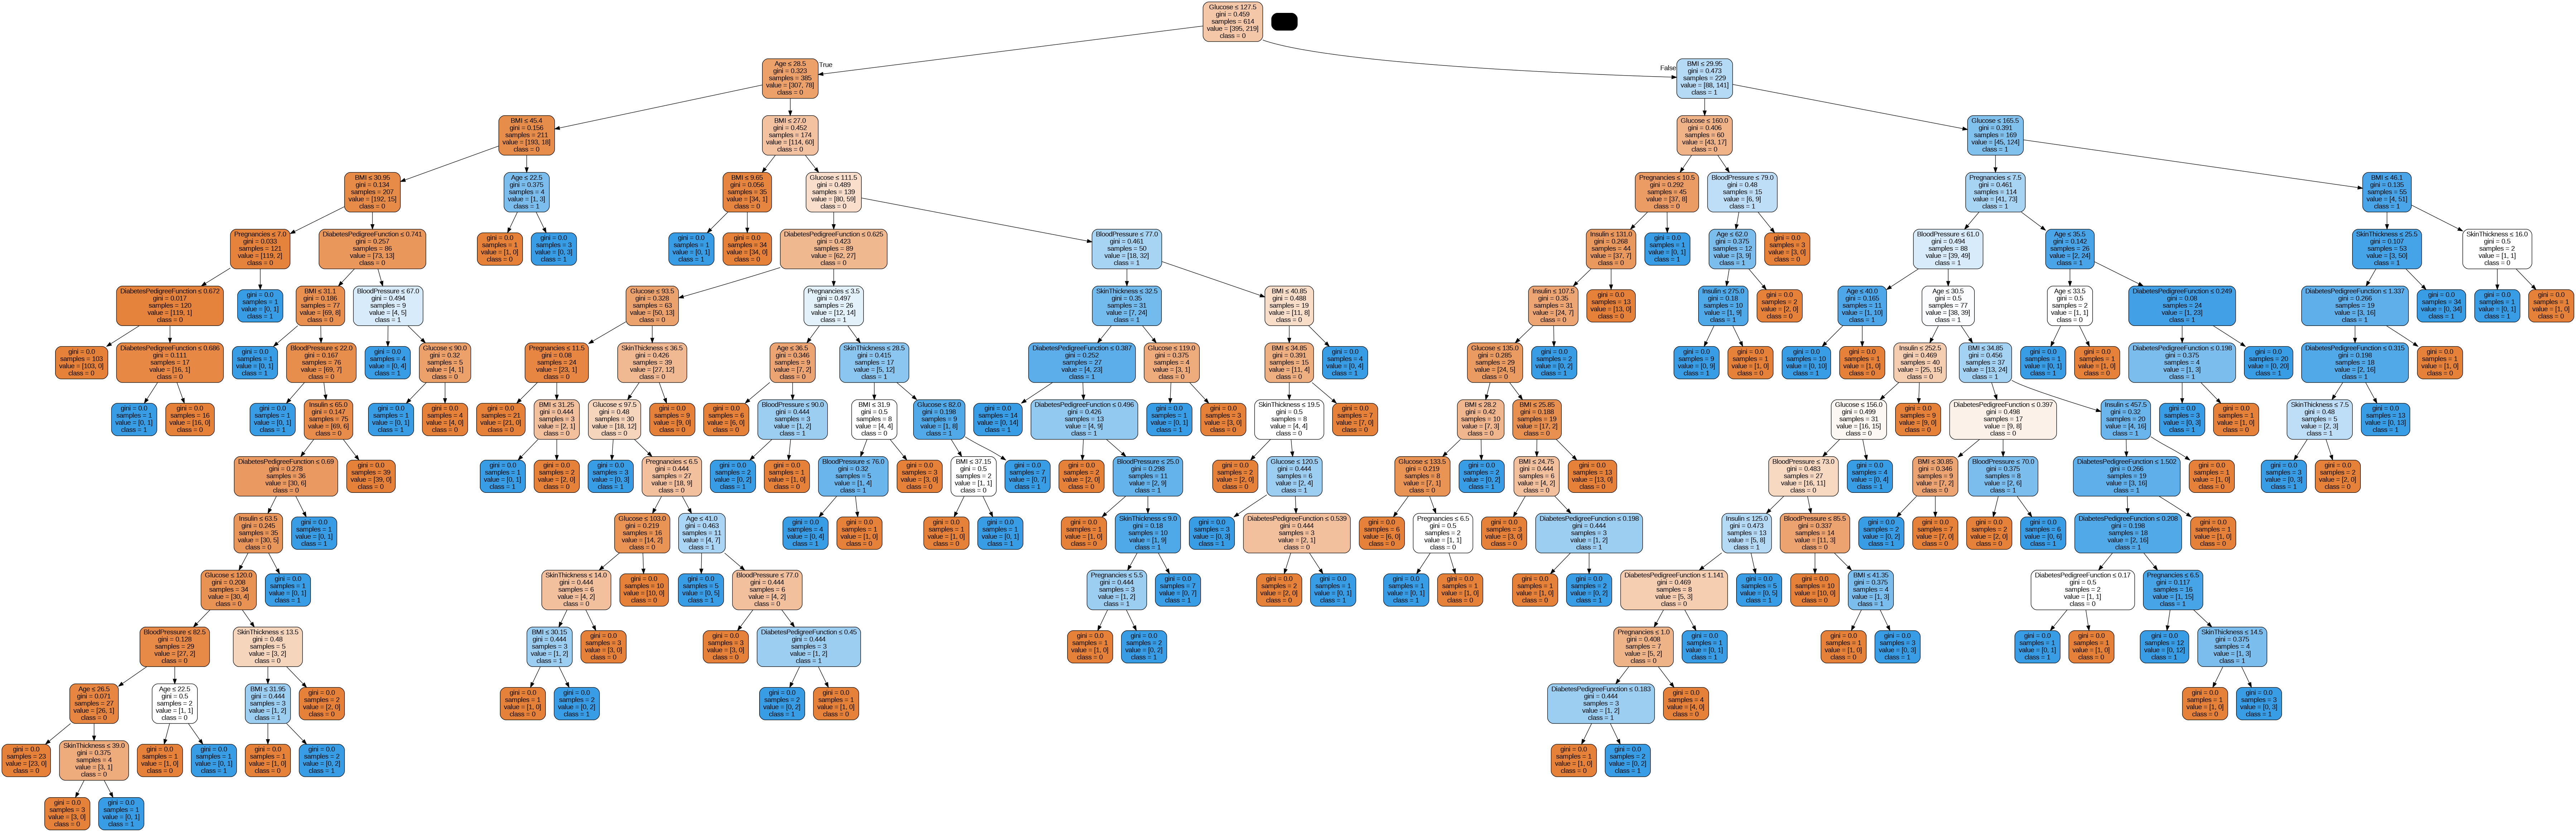

In [41]:
dot_data = StringIO()
export_graphviz(dctree_model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [42]:
entropy_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

entropy_model = entropy_model.fit(xTrain,yTrain)

yPred = entropy_model.predict(xTest)

print("Accuracy of our model after entropy: ", metrics.accuracy_score(yTest, yPred)*100)

Accuracy of our model after entropy:  69.48051948051948


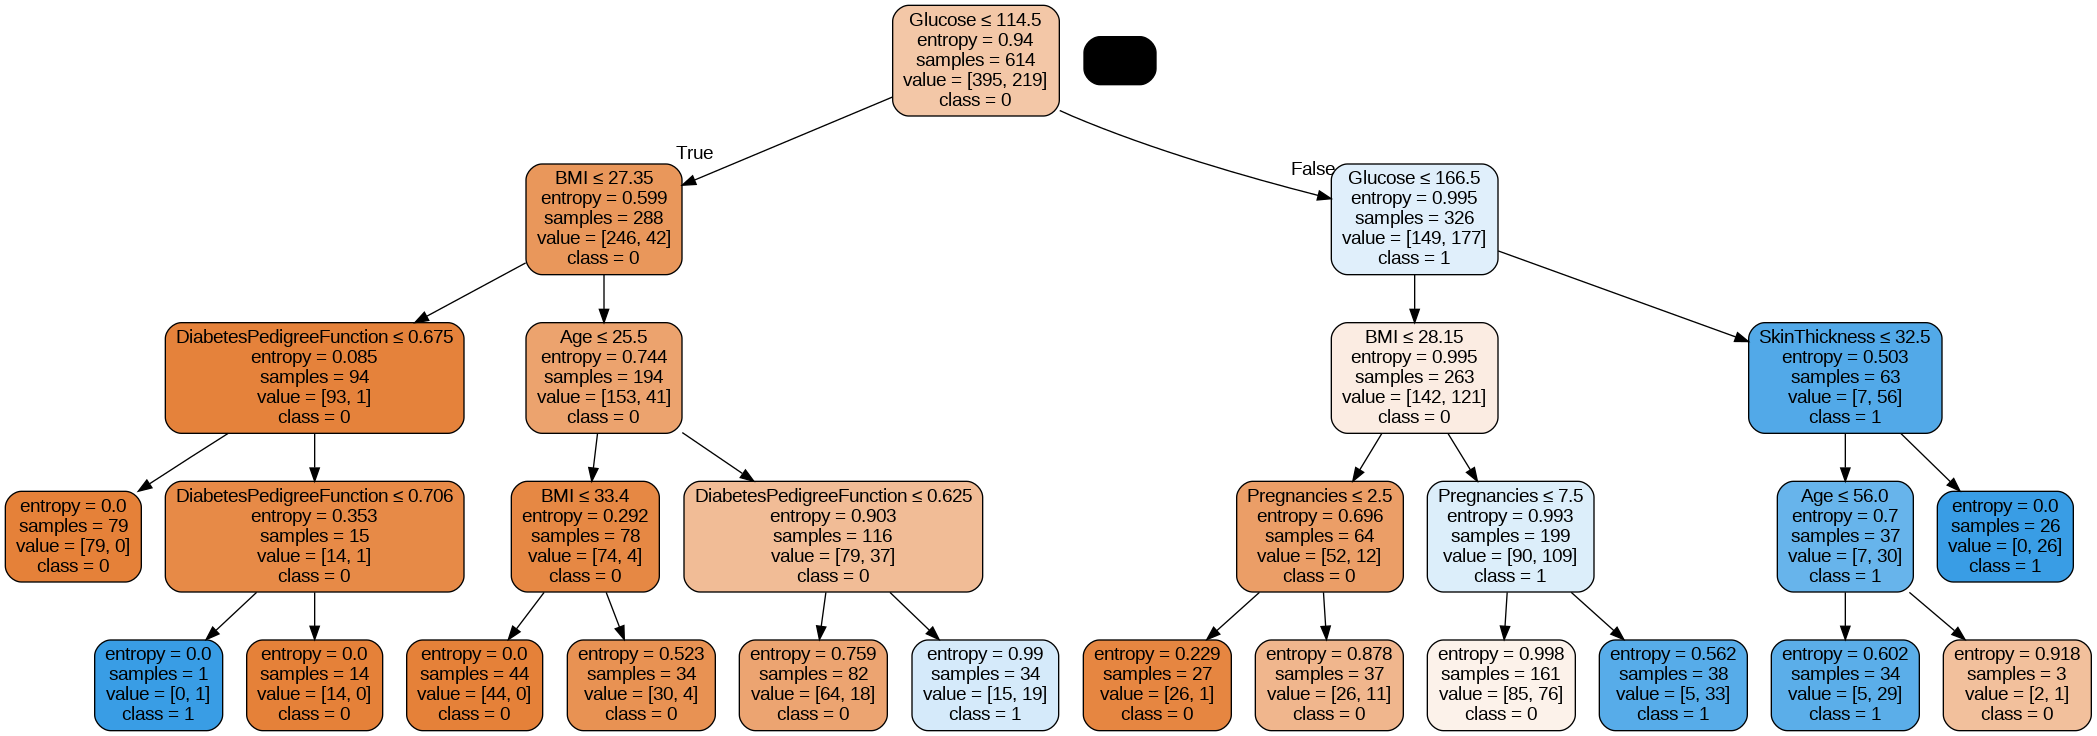

In [47]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(entropy_model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_entropy.png')
Image(graph.create_png())